# PME3481 - Controle e Aplicações

### Configuração do Ambiente e Bibliotecas

Introdução das bibliotecas mais importantes.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lti, lsim

Lista de constantes

In [10]:
Xcm = 1.052
Xpe = 0.261
L = 3.304
Df = 0.127
Tlin = 230.57
Izz = 15.07
M = 23.545
g = 9.8055
dar = 1.091
Cd = 0.432
Vxlin = -10.0

In [11]:
# X = [x,y,theta,xp,yp,thetap]
# Xp = [xp,yp,thetap,xpp,ypp,thetapp]
A = np.array([[0, 0, 0, 1, 0, 0],
              [0, 0, 0, 0, 1, 0],
              [0, 0, 0, 0, 0, 1],
              [0, 0, 1/M*(1/2)*dar*Cd*Df*L*(Vxlin)**2, (1/M)*(Vxlin *dar*Cd*((Df/2)**2*np.pi)), 0, 0],
              [0, 0, (1/M)*(-M*g+(1/2)*Vxlin**2*dar*Cd*(np.pi*(Df/2)**2)), 0, 0, 0],
              [0, 0, (1/Izz)*((1/2)*Vxlin**2*dar*Xpe*Cd*(np.pi*(Df/2)**2)), 0, 0, 0]])
# u = [T,tau]
B = np.array([[0, 0],
              [0, 0],
              [0, 0],
              [1/M, 0],
              [0, -Tlin/M],
              [0, -Tlin*Xcm/Izz]])

C = np.array([[ 0, 0, 1, 0, 0, 0],
              [ 0, 0, 0, 1, 0, 0],
              [ 0, 0, 0, 0, 1, 0]])

D = np.array([[ 0, 0],
              [ 0, 0],
              [ 0, 0]])

In [12]:
# Crie um sistema linear invariante no tempo (LTI)
system = lti(A, B, C, D)

# Defina o vetor de tempo da simulação
# Defina o vetor de tempo da simulação
t = np.linspace(0, 10, 1000)

# Defina a entrada senoidal para duas componentes (duas entradas)
u = np.column_stack([np.sin(2 * np.pi * 1 * t), np.zeros_like(t)])

# Simule o sistema
t, y, x = lsim(system, U=u, T=t)

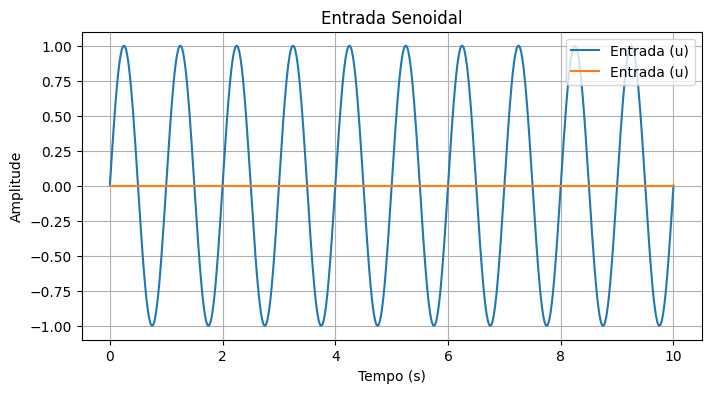

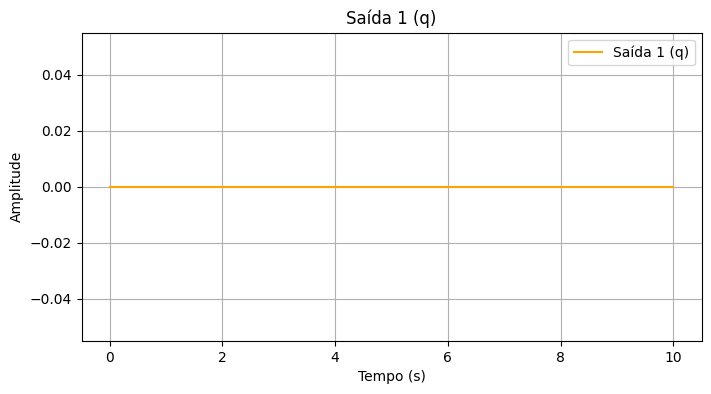

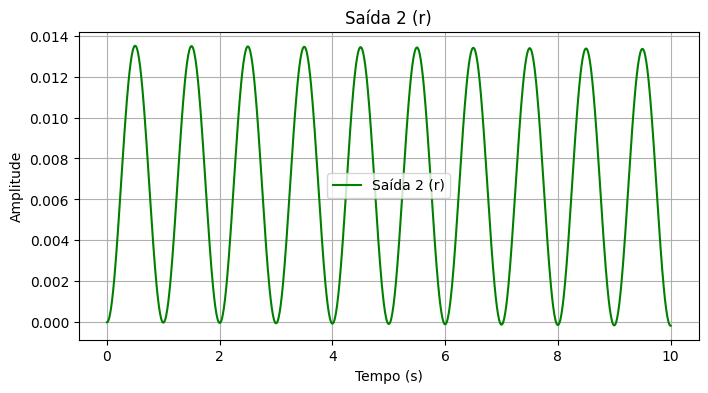

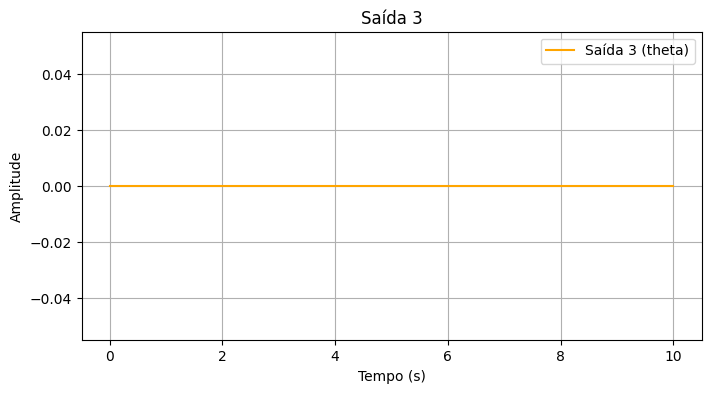

IndexError: index 3 is out of bounds for axis 1 with size 3

<Figure size 800x400 with 0 Axes>

In [13]:

# Gráfico da Entrada Senoidal
plt.figure(figsize=(8, 4))
plt.plot(t, u, label='Entrada (u)')
plt.legend()
plt.title('Entrada Senoidal')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Gráfico da Saída 1 (q)
plt.figure(figsize=(8, 4))
plt.plot(t, y[:, 0], label='Saída 1 (q)', color='orange')
plt.legend()
plt.title('Saída 1 (q)')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Gráfico da Saída 2 (r)
plt.figure(figsize=(8, 4))
plt.plot(t, y[:, 1], label='Saída 2 (r)', color='green')
plt.legend()
plt.title('Saída 2 (r)')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Gráfico da Saída 1 (q)
plt.figure(figsize=(8, 4))
plt.plot(t, y[:, 2], label='Saída 3 (theta)', color='orange')
plt.legend()
plt.title('Saída 3')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Gráfico da Saída 2 (r)
plt.figure(figsize=(8, 4))
plt.plot(t, y[:, 3], label='Saída 4 (thetap)', color='green')
plt.legend()
plt.title('Saída 4')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

In [14]:
t_step = 5

# Defina a entrada degrau para duas componentes (duas entradas)
u_step = np.column_stack([np.ones_like(t), np.heaviside(t - t_step, 1)])

# Simule o sistema com a entrada degrau
t, y_step, x_step = lsim(system, U=u_step, T=t)

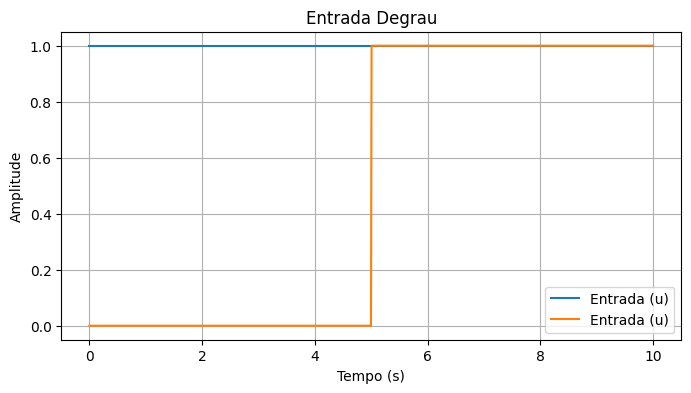

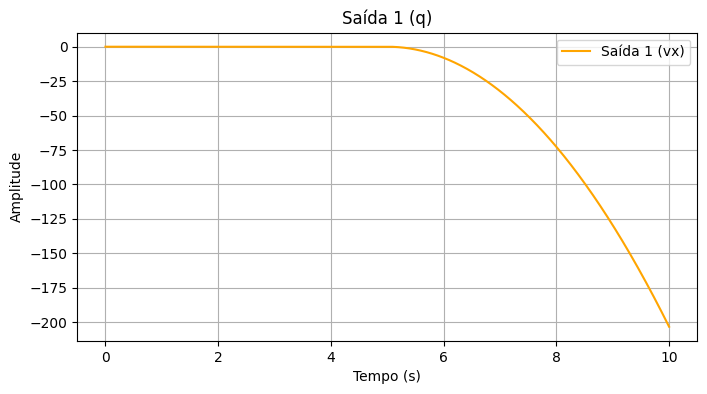

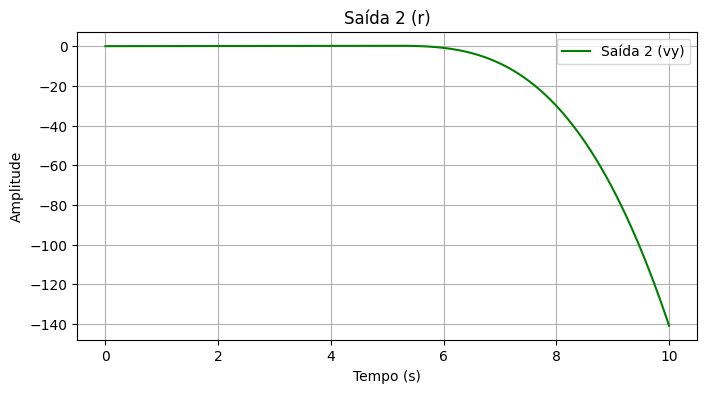

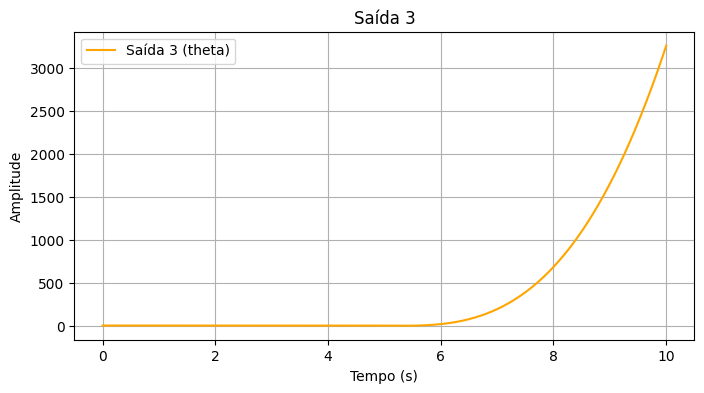

IndexError: index 3 is out of bounds for axis 1 with size 3

<Figure size 800x400 with 0 Axes>

In [15]:
# Gráfico da Entrada Senoidal
plt.figure(figsize=(8, 4))
plt.plot(t, u_step, label='Entrada (u)')
plt.legend()
plt.title('Entrada Degrau')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Gráfico da Saída 1 (q)
plt.figure(figsize=(8, 4))
plt.plot(t, y_step[:, 0], label='Saída 1 (vx)', color='orange')
plt.legend()
plt.title('Saída 1 (q)')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Gráfico da Saída 2 (r)
plt.figure(figsize=(8, 4))
plt.plot(t, y_step[:, 1], label='Saída 2 (vy)', color='green')
plt.legend()
plt.title('Saída 2 (r)')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


# Gráfico da Saída 1 (q)
plt.figure(figsize=(8, 4))
plt.plot(t, y_step[:, 2], label='Saída 3 (theta)', color='orange')
plt.legend()
plt.title('Saída 3')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Gráfico da Saída 2 (r)
plt.figure(figsize=(8, 4))
plt.plot(t, y_step[:, 3], label='Saída 4 (thetap)', color='green')
plt.legend()
plt.title('Saída 4')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()